# Random Forest 

A large number of relatively uncorrelated models (trees) operating as a committee will outperform any of the individual constituent models.

# Bagging (Bootstrap Aggregation) —
Decisions trees are very sensitive to the data they are trained on — small changes to the training set can result in significantly different tree structures. Random forest takes advantage of this by allowing each individual tree to randomly sample from the dataset with replacement, resulting in different trees. This process is known as bagging.

# issue with decision tree
Even though Decision Trees is simple and flexible, it is greedy algorithm. It focuses on optimizing for the node split at hand, rather than taking into account how that split impacts the entire tree. A greedy approach makes Decision Trees run faster, but makes it prone overfitting.

# Random Forests
Random Forests was developed specifically to address the problem of high-variance in Decision Trees. Like the name suggests, you’re not training a single Decision Tree, you’re training an entire forest! In this case, a forest of Bagged Decision Trees.

Take the original dataset and create N bagged samples of size n, with n smaller than the original dataset.

Train a Decision Tree with each of the N bagged datasets as input. But, when doing a node split, don’t explore all features in 
the dataset. Randomly select a smaller number, M features, from all the features in training set. Then pick the best split using impurity measures, like Gini Impurity or Entropy.

Aggregate the results of the individual decision trees into a single output.

Average the values for each observation, produced by each tree, if you’re working on a Regression task.

Do a majority vote across all trees, for each observation, if you’re working on a Classification task.

# random forest

![](randomforest.png)

# tree 
![](tree.png)

# bagging and boosting 
![](boostingandbagging.png)

# Bagging: Bootstrap Aggregation
Bagging, short for Bootstrap Aggregation, is a technique developed by Leo Breiman, with the goal of reducing the variance of a learning model. Bagging is also model agnostic, so regardless of type of model you’re using, the process is the same.
The Bootstrapping part of Bagging refers to the resampling method in which several random samples are drawn with replacement from a dataset[3]. As a consequence, Bootstrapping creates multiple, smaller random datasets drawn from the same distribution.
Each of the bootstrapped datasets is used to train a model, and the outputs are then Aggregated into one final result.
But aggregation also means different things, depending on the type of problem you’re solving.
When you’re working on a Regression problem, aggregation means averaging the results of each observation, across all models. While in Classification aggregation means picking the most common class for each observation, like doing a majority vote.
This is impressive but, how does this actually help reduce model variance?
Each model is trained on a different dataset, because they’re bootstrapped. So inevitably, each model will make different mistakes, and have a distinct error and variance. Both the error and variance get reduced in the aggregation step where, literally in the case of Regression, they are averaged out.
And because you end up with a single model, which combines the output of multiple models, Bagging is called and ensemble technique.

![](bootstrap.png)

# it can works on both 
One of the most important features of the Random Forest Algorithm is that it can handle the data set containing continuous variables as in the case of regression and categorical variables as in the case of classification. It performs better results for classification problems.

# types 
Ensemble uses two types of methods:

1. Bagging– It creates a different training subset from sample training data with replacement & the final output is based on majority voting. For example,  Random Forest.

2. Boosting– It combines weak learners into strong learners by creating sequential models such that the final model has the highest accuracy. For example,  ADA BOOST, XG BOOST



# bootstraping 
Bagging, also known as Bootstrap Aggregation is the ensemble technique used by random forest. Bagging chooses a random sample from the data set. Hence each model is generated from the samples (Bootstrap Samples) provided by the Original Data with replacement known as row sampling. This step of row sampling with replacement is called bootstrap. Now each model is trained independently which generates results. The final output is based on majority voting after combining the results of all models. This step which involves combining all the results and generating output based on majority voting is known as aggregation.

![](bs.png)
![](Bs2.png)

# Important Hyperparameters
Hyperparameters are used in random forests to either enhance the performance and predictive power of models or to make the model faster.

Following hyperparameters increases the predictive power:

1. n_estimators– number of trees the algorithm builds before averaging the predictions.

2. max_features– maximum number of features random forest considers splitting a node.

3. mini_sample_leaf– determines the minimum number of leaves required to split an internal node.

Following hyperparameters increases the speed:

1. n_jobs– it tells the engine how many processors it is allowed to use. If the value is 1, it can use only one processor but if the value is -1 there is no limit.

2. random_state– controls randomness of the sample. The model will always produce the same results if it has a definite value of random state and if it has been given the same hyperparameters and the same training data.

3. oob_score – OOB means out of the bag. It is a random forest cross-validation method. In this one-third of the sample is not used to train the data instead used to evaluate its performance. These samples are called out of bag samples.

 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
dataset=pd.read_csv("./Social_Network_Ads.csv")
features=dataset.iloc[:,[2,3]].values
label=dataset.Purchased

In [3]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(features,label,test_size=0.2)

In [4]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.fit_transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=10)
model.fit(X_train,y_train)

In [ ]:
train_score=model.score(X_train,y_train)

In [ ]:
train_score

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test,y_pred)

In [ ]:
acc
y_test=np.array(y_test)
y_pred=np.array(y_pred)

In [ ]:
from sklearn.metrics import confusion_matrix
# cm = confusion_matrix(y_test, y_pred)
# print(cm)
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model,X_test,y_test)

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Random Forest Classification (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Random Forest Classification (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [ ]:
from mlxtend.plotting import plot_learning_curves
plot_learning_curves(X_train, y_train, X_test, y_test, model)
plt.show()

In [ ]:
from skimage.feature import hog
import os 
import cv2

In [ ]:
DATADIR="./dataset/"
CATEGORIES=["cats","dogs"]
training_data = []

for category in CATEGORIES:
    path=os.path.join(DATADIR, category)
    class_num=CATEGORIES.index(category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        img_array=cv2.resize(img_array,(64,128))
        img_array = img_array/255.0
        fd,hog_image = hog(img_array, orientations=8, pixels_per_cell=(16,16),cells_per_block=(4, 4),block_norm= 'L2',visualize=True)
        training_data.append([fd,class_num])

In [ ]:
features=[]
label=[]
for f,l in training_data:
    features.append(f)
    label.append(l)
    

In [ ]:
len(features)
len_features=253
features.shape

In [ ]:
# features=np.array(features).reshape(len_features,-1)
# labels=np.array(labels)

In [ ]:
features=np.vstack(features)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(features,label,test_size=0.2)

In [ ]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.fit_transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
e1=cv2.getTickCount()
model=RandomForestClassifier(n_estimators=1000,)
model.fit(X_train,y_train)
e2=cv2.getTickCount()
t=(e2-e1)/cv2.getTickFrequency()

In [ ]:
print(f'time {t}')
y_pred=model.predict(X_test)
confidence=accuracy_score(y_test,y_pred)
print(f'accuracy {confidence}')
print(model.score(X_train,y_train))

In [ ]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, X_test, y_test)  
plt.show()

from mlxtend.plotting import plot_learning_curves
plot_learning_curves(X_train, y_train, X_test, y_test, model)
plt.show()

In [ ]:
import seaborn as sns
is_null=pd.DataFrame(features)

In [ ]:
sns.heatmap(is_null.isnull())

# new classfication 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [ ]:
log_clf = LogisticRegression()
nav_clf=GaussianNB()
rnd_clf = RandomForestClassifier(n_estimators=500)
svm_clf = SVC(probability=True,C=1.02)

In [ ]:
voting_clf = VotingClassifier(
 estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf),('nav',nav_clf)],
 voting='soft',flatten_transform=True)
voting_clf.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import accuracy_score
for clf in (log_clf, rnd_clf, svm_clf, voting_clf,nav_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

In [ ]:
y_pred=voting_clf.predict(X_test)

In [ ]:
acc=accuracy_score(y_test,y_pred)

In [ ]:
acc

In [ ]:
print(voting_clf.score(X_train,y_train))

In [ ]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(voting_clf, X_test, y_test)  
plt.show()

from mlxtend.plotting import plot_learning_curves
plot_learning_curves(X_train, y_train, X_test, y_test, voting_clf)
plt.show()

#  baggging and pasting

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
bag_clf = BaggingClassifier(
 DecisionTreeClassifier(), n_estimators=1000,
  bootstrap=True, n_jobs=-1)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [ ]:
acc=accuracy_score(y_test,y_pred)

In [ ]:
acc

In [ ]:
from mlxtend.plotting import plot_learning_curves
plot_learning_curves(X_train, y_train, X_test, y_test, bag_clf)
plt.show()

In [1]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, bad_clf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Random Forest Classification (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

NameError: name 'X_test' is not defined

In [2]:
>>> bag_clf = BaggingClassifier(
... DecisionTreeClassifier(), n_estimators=500,
... bootstrap=True, n_jobs=-1, oob_score=True)
...
>>> bag_clf.fit(X_train, y_train)
>>> bag_clf.oob_score_

NameError: name 'BaggingClassifier' is not defined

In [3]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
rnd_clf.fit(X_train, y_train)
y_pred_rf = rnd_clf.predict(X_test)

NameError: name 'X_train' is not defined

In [4]:
bag_clf = BaggingClassifier(
 DecisionTreeClassifier(splitter="random", max_leaf_nodes=16),
 n_estimators=500, max_samples=1.0, bootstrap=True, n_jobs=-1)


NameError: name 'BaggingClassifier' is not defined

In [1]:
# heart disease 


In [2]:
# Importing the required libraries
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [19]:
# Reading the csv file and putting it into 'df' object
dataset=pd.read_csv("./heart.csv")
# dataset

In [17]:
features=dataset.iloc[:,:-1].values
label=dataset.target

In [20]:
# now lets split the data into train and test
from sklearn.model_selection import train_test_split

In [22]:
#  Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(features, label, train_size=0.7, random_state=42)
X_train.shape, X_test.shape

((212, 13), (91, 13))

In [24]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)

In [25]:
%%time
classifier_rf.fit(X_train, y_train)

Wall time: 277 ms


RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [26]:
# checking the oob score
classifier_rf.oob_score_

0.8018867924528302

In [27]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [29]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

In [30]:
from sklearn.model_selection import GridSearchCV
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [31]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   18.4s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   34.4s


Wall time: 54.3 s


[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:   54.1s finished


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [33]:
grid_search.best_score_
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=3, min_samples_leaf=5, n_estimators=25,
                       n_jobs=-1, random_state=42)

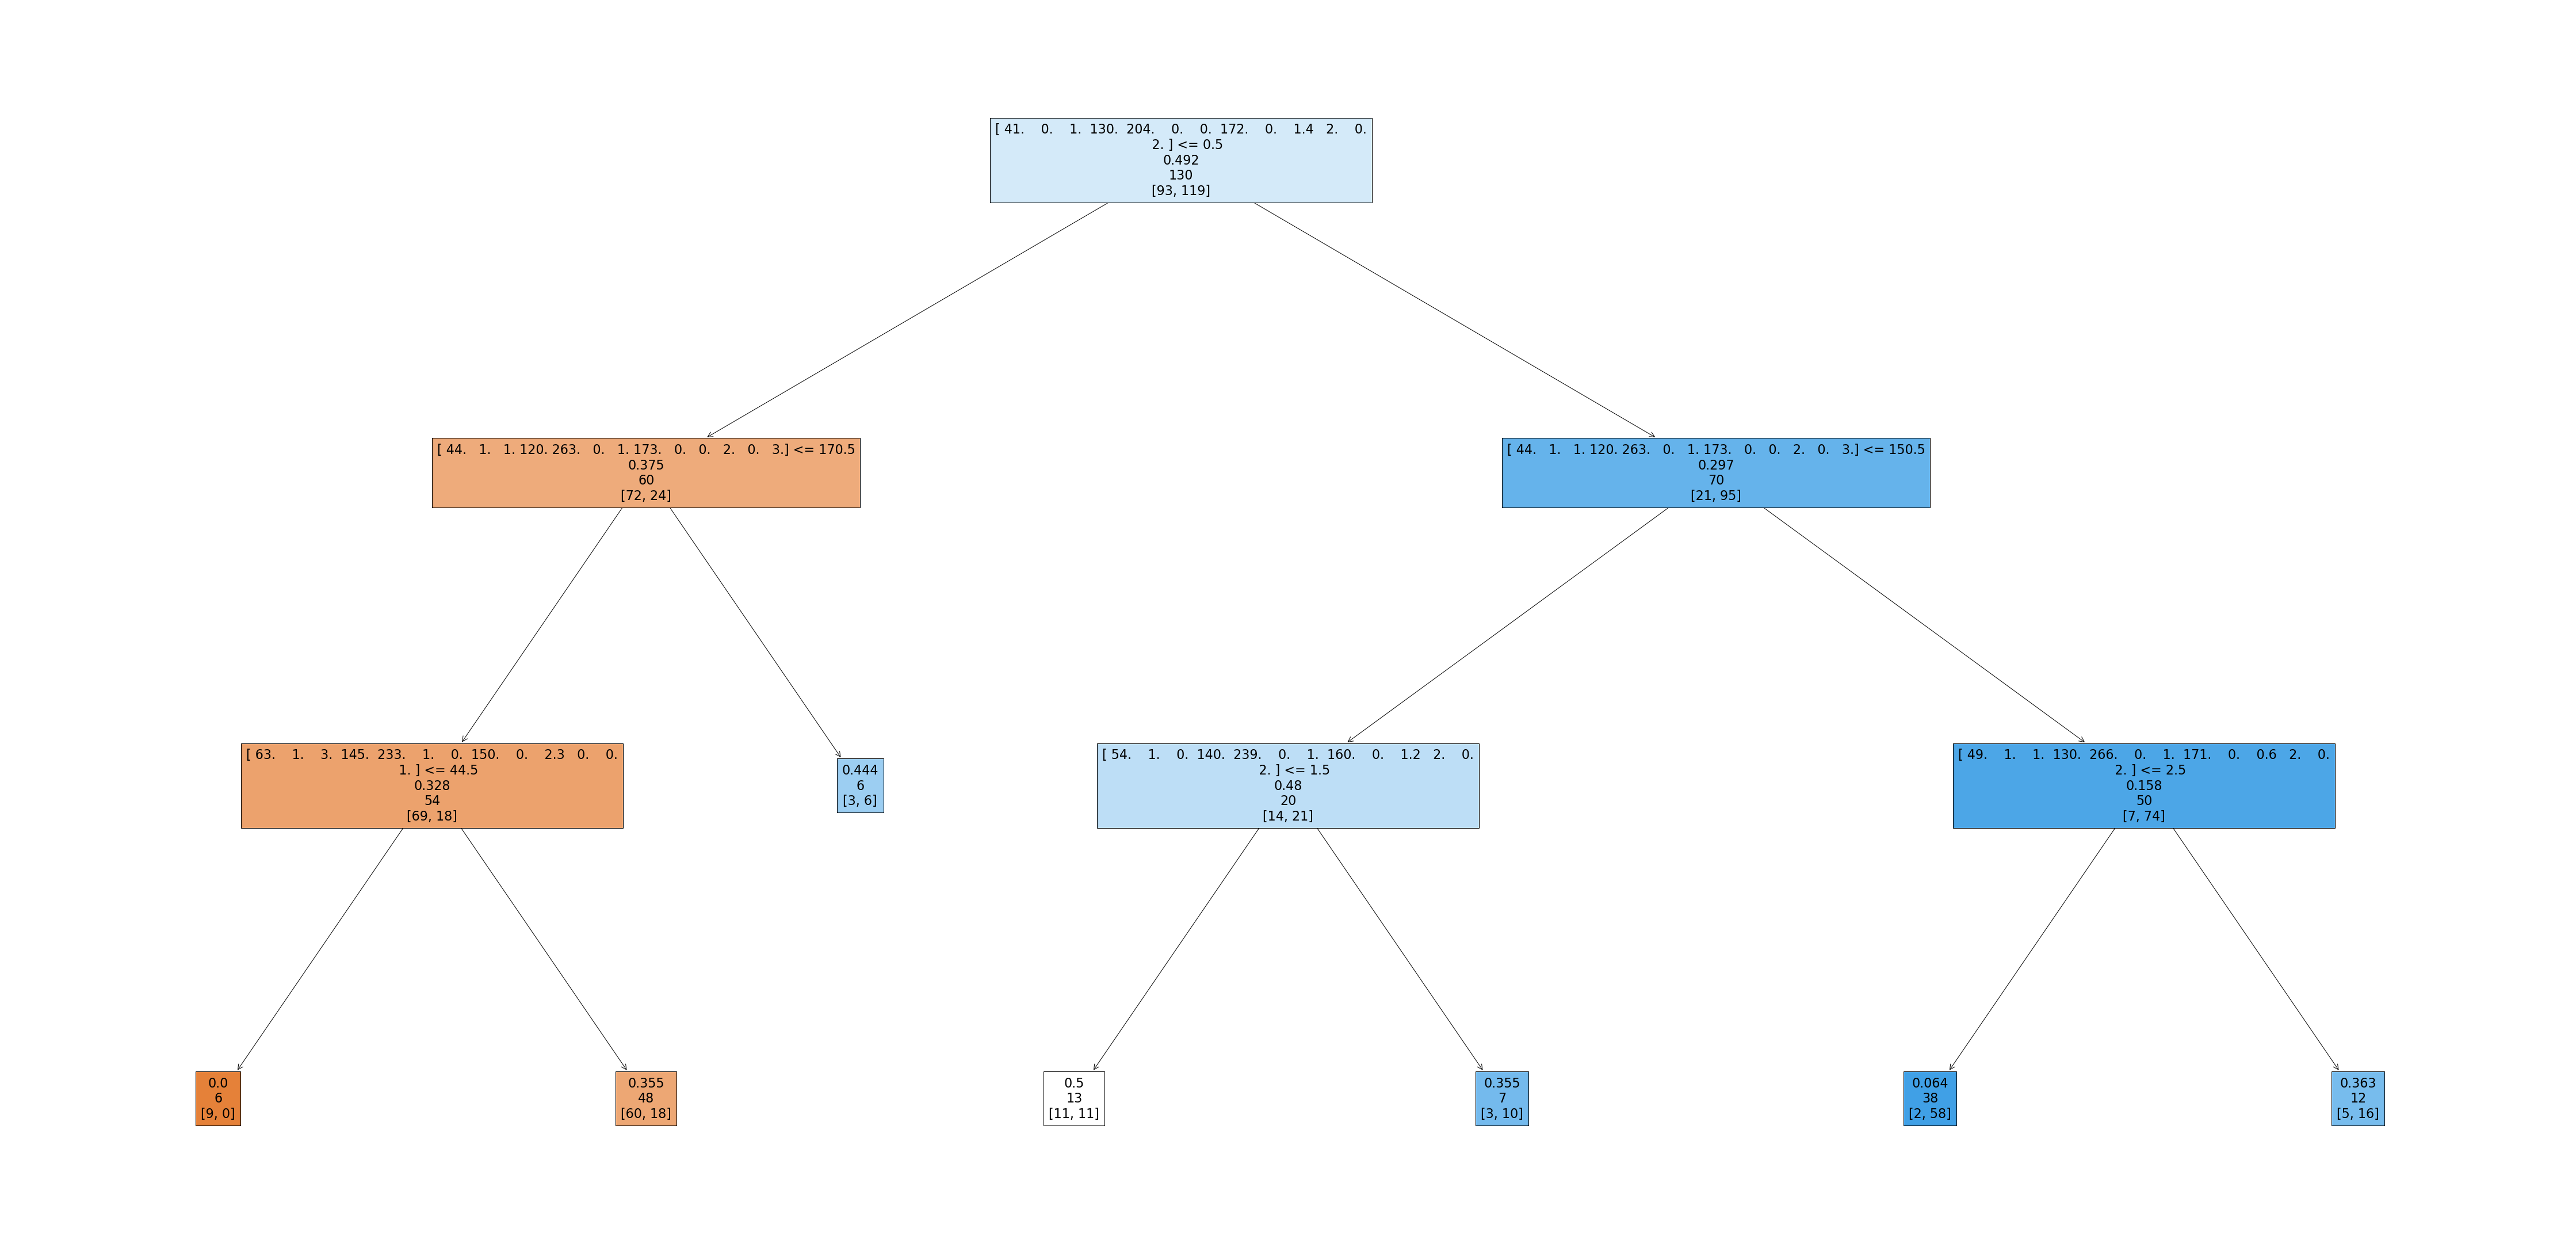

In [36]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[5], feature_names = features,label=['Disease', "No Disease"],filled=True);

# bagging and pasting 


In [9]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
bag_clf = BaggingClassifier(
 DecisionTreeClassifier(), n_estimators=500,
 max_samples=20, bootstrap=False, n_jobs=-1)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [10]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test,y_pred)

In [11]:
acc

0.9375

# out-of-Bag Evaluation
With bagging, some instances may be sampled several times for any given predictor,
while others may not be sampled at all. By default a BaggingClassifier samples m
training instances with replacement (bootstrap=True), where m is the size of the
training set. This means that only about 63% of the training instances are sampled on
average for each predictor.6
 The remaining 37% of the training instances that are not
sampled are called out-of-bag (oob) instances. Note that they are not the same 37%
for all predictors.

In [13]:
>>> bag_clf = BaggingClassifier(
... DecisionTreeClassifier(), n_estimators=500,
... bootstrap=True, n_jobs=-1, oob_score=True)
...
>>> bag_clf.fit(X_train, y_train)
>>> bag_clf.oob_score_

0.8875

In [14]:
>>> from sklearn.metrics import accuracy_score
>>> y_pred = bag_clf.predict(X_test)
>>> accuracy_score(y_test, y_pred)

0.95

# random forest
As we have discussed, a Random Forest9
 is an ensemble of Decision Trees, generally
trained via the bagging method (or sometimes pasting), typically with max_samples
set to the size of the training set. Instead of building a BaggingClassifier and pass‐
ing it a DecisionTreeClassifier, you can instead use the RandomForestClassifier
class, which is more convenient and optimized for Decision Trees10 (similarly, there is
a RandomForestRegressor class for regression tasks). The following code uses all
available CPU cores to train a Random Forest classifier with 500 tree

In [15]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
rnd_clf.fit(X_train, y_train)
y_pred_rf = rnd_clf.predict(X_test)


In [16]:
bag_clf = BaggingClassifier(
 DecisionTreeClassifier(splitter="random", max_leaf_nodes=16),
 n_estimators=500, max_samples=1.0, bootstrap=True, n_jobs=-1)


In [18]:
>>> for name, score in zip(X_train, rnd_clf.feature_importances_):
    print(name, score)

[ 0.78679765 -1.41541268] 0.5528715662377858
[0.4007873  0.60633601] 0.44712843376221423


# boosting

Boosting
Boosting (originally called hypothesis boosting) refers to any Ensemble method that
can combine several weak learners into a strong learner. The general idea of most
boosting methods is to train predictors sequentially, each trying to correct its prede‐
cessor

# AdaBoost
For example, when training an AdaBoost classifier, the algorithm first trains a base
classifier (such as a Decision Tree) and uses it to make predictions on the training set.
The algorithm then increases the relative weight of misclassified training instances.
Then it trains a second classifier, using the updated weights, and again makes predic‐
tions on the training set, updates the instance weights

# SAMME
Scikit-Learn uses a multiclass version of AdaBoost called SAMME16 (which stands for
Stagewise Additive Modeling using a Multiclass Exponential loss function). When there
are just two classes, SAMME is equivalent to AdaBoost. If the predictors can estimate
class probabilities (i.e., if they have a predict_proba() method), Scikit-Learn can use
a variant of SAMME called SAMME.R (the R stands for “Real”), which relies on class
probabilities rather than predictions and generally performs better

In [19]:
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(
 DecisionTreeClassifier(max_depth=1), n_estimators=200,
 algorithm="SAMME.R", learning_rate=0.5)
ada_clf.fit(X_train, y_train)


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=200)

In [31]:
from sklearn.metrics import accuracy_score
y_pred = ada_clf.predict(X_test)
accuracy_score(y_test, y_pred)
X=X_train
y=y_train


# Gradient Boosting
Another very popular boosting algorithm is Gradient Boosting.
17 Just like AdaBoost,
Gradient Boosting works by sequentially adding predictors to an ensemble, each one
correcting its predecessor. However, instead of tweaking the instance weights at every
iteration like AdaBoost does, this method tries to fit the new predictor to the residual
errors made by the previous predictor.


In [32]:
from sklearn.tree import DecisionTreeRegressor
tree_reg1 = DecisionTreeRegressor(max_depth=2)
tree_reg1.fit(X, y)


DecisionTreeRegressor(max_depth=2)

In [33]:
y2 = y - tree_reg1.predict(X)
tree_reg2 = DecisionTreeRegressor(max_depth=2)
tree_reg2.fit(X_train, y2)

DecisionTreeRegressor(max_depth=2)

In [34]:
y3 = y2 - tree_reg2.predict(X)
tree_reg3 = DecisionTreeRegressor(max_depth=2)
tree_reg3.fit(X, y3)


DecisionTreeRegressor(max_depth=2)

In [36]:
y_pred = sum(tree.predict(X) for tree in (tree_reg1, tree_reg2, tree_reg3))

# Gradient boosting


In [45]:
from sklearn.ensemble import GradientBoostingRegressor
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0)
gbrt.fit(X_train, y_train)


GradientBoostingRegressor(learning_rate=1.0, max_depth=2, n_estimators=3)

In [46]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train)
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=120)
gbrt.fit(X_train, y_train)
errors = [mean_squared_error(y_val, y_pred)
 for y_pred in gbrt.staged_predict(X_val)]
bst_n_estimators = np.argmin(errors) + 1
gbrt_best = GradientBoostingRegressor(max_depth=2,n_estimators=bst_n_estimators)
gbrt_best.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=2, n_estimators=59)

# early stopping 

In [55]:
gbrt = GradientBoostingRegressor(max_depth=2, warm_start=True)
min_val_error = float("inf")
error_going_up = 0
for n_estimators in range(1, 120): 
    gbrt.n_estimators = n_estimators
    gbrt.fit(X_train, y_train)
    y_pred = gbrt.predict(X_val)
    val_error = mean_squared_error(y_val, y_pred)
    if val_error < min_val_error:
        min_val_error = val_error
        error_going_up = 0
    else:
        error_going_up += 1
    if error_going_up == 5:
        break # early stopping

#  XGBoost, 

t is worth noting that an optimized implementation of Gradient Boosting is available
in the popular Python library XGBoost, which stands for Extreme Gradient Boosting.
This package was initially developed by Tianqi Chen as part of the Distributed (Deep)
Machine Learning Community (DMLC), and it aims to be extremely fast, scalable,
and portable. In fact, XGBoost is often an important component of the winning
entries in ML competitions

In [60]:
import xgboost
xgb_reg = xgboost.XGBRegressor()
xgb_reg.fit(X_train, y_train)
y_pred = xgb_reg.predict(X_val)
xgb_reg.fit(X_train, y_train,
 eval_set=[(X_val, y_val)], early_stopping_rounds=2)
y_pred = xgb_reg.predict(X_val)


ModuleNotFoundError: No module named 'xgboost'